In [1]:
from experiment import add_experiment
from experiment_tracking import read_experiments, get_results_file, get_baseline, load_experiments
from evaluation import test_colour_model, colour_probs, colour_dict, name_to_rgb
from util import add_config_option, create_experiment
import pandas as pd
%matplotlib inline
labels = ['Language', 'No Language', 'Naive']


In [2]:
df = read_experiments()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,config_name,experiment_file,neural_config,status
index,,,,
0,None,None,None,None
1,simple_neural,results/simplecolours/agents.NeuralCorrectingA...,DEFAULT,done
2,neural_onerule5000,results/onerule5000/agents.NeuralCorrectingAge...,adam_lr:0.1,done
3,neural_onerule5000,results/onerule5000/agents.NeuralCorrectingAge...,adam_lr:1,done
4,neural_onerule5000,results/onerule5000/agents.NeuralCorrectingAge...,nesterov_lr:0.1mom:0,done
5,neural_onerule5000,results/onerule5000/agents.NeuralCorrectingAge...,nesterov_lr:0.1mom:0.4,done
6,tworules,results/tworules/agents.CorrectingAgent/0.7/ex...,None,done
7,tworules_no_update,results/tworules/agents.CorrectingAgent/0.7/ex...,None,done
8,tworules,results/tworules/agents.CorrectingAgent/0.7/ex...,None,done


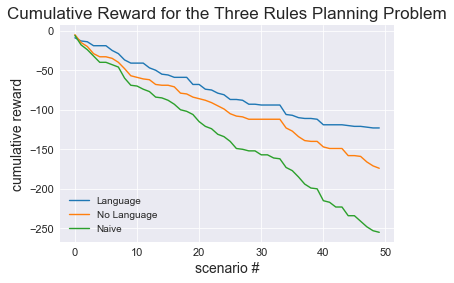

In [2]:
exp = load_experiments([309, 300], 'threerules')
exp.plot(labels=labels, dataset_label='Three Rules')

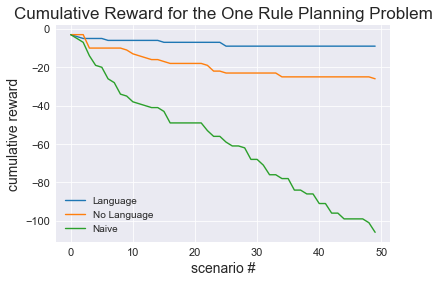

In [3]:
exp = load_experiments([194, 186], 'onerule')
exp.plot(labels=labels, dataset_label='One Rule')


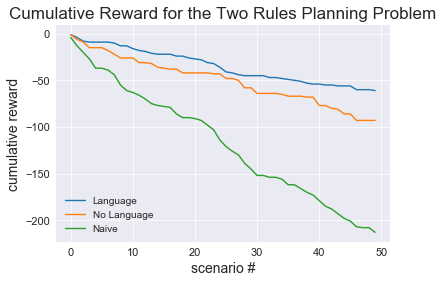

In [5]:
exp = load_experiments([292, 299], 'tworules2')
exp.plot(labels=labels, dataset_label='Two Rules')

In [24]:
exp.results_files

{'agents.CorrectingAgent_0': <evaluation.ResultsFile at 0x7f49fd13de10>,
 'agents.NoLanguageAgent_0': <evaluation.ResultsFile at 0x7f49feab5550>,
 'agents.RandomAgent_0': <evaluation.ResultsFile at 0x7f49fcecb668>}

In [28]:
a = exp.get_agent('agents.CorrectingAgent_0')
corr_models = list(a.rule_models.values())
print(corr_models)
table_1 = corr_models[0]
table_2 = corr_models[1]
table_3 = corr_models[3]

[<prob_model.CorrectionModel object at 0x7f49fd020c18>, <prob_model.CorrectionModel object at 0x7f49fcff77b8>, <prob_model.TableCorrectionModel object at 0x7f49fd005208>, <prob_model.CorrectionModel object at 0x7f49fd005c88>, <prob_model.TableCorrectionModel object at 0x7f49fd00f208>, <prob_model.TableCorrectionModel object at 0x7f49fd00fc50>]


In [31]:
rb = table_3.rule_belief
rb.belief

array([[1.00000000e+00, 1.73886231e-29],
       [2.22044605e-16, 0.00000000e+00]])

In [29]:
print(a.goal.asPDDL())

(and (forall (?x) (in-tower ?x)) (forall (?x) (or (not (purple ?x)) (exists (?y) (and (orange ?y) (on ?x ?y))))) (forall (?x) (or (not (red ?x)) (exists (?y) (and (blue ?y) (on ?x ?y))))) (forall (?x) (or (not (green ?x)) (exists (?y) (and (yellow ?y) (on ?x ?y))))) (forall (?y) (or (not (yellow ?y)) (exists (?x) (and (green ?x) (on ?x ?y))))))


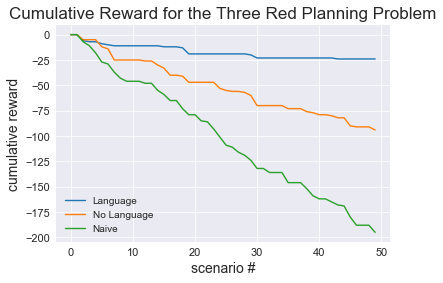

In [6]:
exp = load_experiments([267, 290], 'triplicatered')
exp.plot(labels=labels, dataset_label='Three Red')

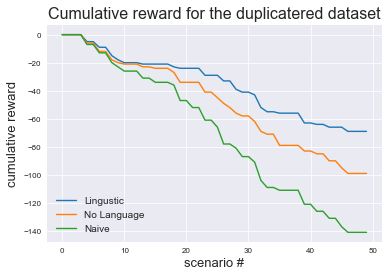

Lingustic -22.0
No Language -42.0
Naive -65.0


In [5]:
exp = load_experiments([247, 264], 'duplicatered')
exp.show_results(labels=labels)

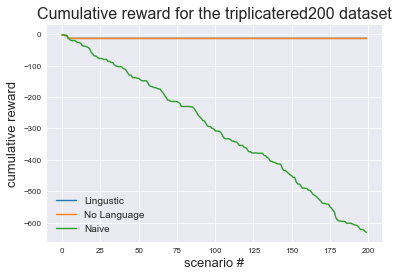

Lingustic 0.0
No Language 0.0
Naive -71.0


In [6]:
exp = load_experiments([242, 242], 'triplicatered200')
exp.show_results(labels=labels)

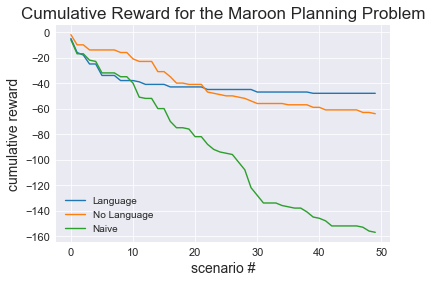

In [7]:
exp = load_experiments([227, 261], 'maroon')
exp.plot(labels=labels, dataset_label='Maroon')

True Label  R=1 R=0
Predict R=1| 5 | 0 |
        R=0| 0 | 37 |
True Label  B=1 B=0
Predict B=1| 9 | 10 |
        B=0| 0 | 23 |
True Label  G=1 G=0
Predict G=1| 10 | 13 |
        G=0| 0 | 19 |
True Label  M=1 M=0
Predict M=1| 0 | 38 |
        M=0| 0 | 4 |
True Label  R=1 R=0
Predict R=1| 5 | 0 |
        R=0| 0 | 37 |
True Label  B=1 B=0
Predict B=1| 8 | 2 |
        B=0| 1 | 31 |
True Label  G=1 G=0
Predict G=1| 7 | 0 |
        G=0| 3 | 32 |
True Label  M=1 M=0
Predict M=1| 0 | 9 |
        M=0| 0 | 33 |


[('red', {'fn': 0, 'fp': 0, 'tn': 37, 'tp': 5}),
 ('blue', {'fn': 1, 'fp': 2, 'tn': 31, 'tp': 8}),
 ('green', {'fn': 3, 'fp': 0, 'tn': 32, 'tp': 7}),
 ('maroon', {'fn': 0, 'fp': 9, 'tn': 33, 'tp': 0})]

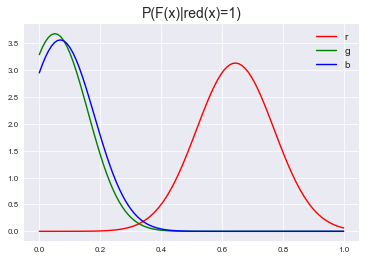

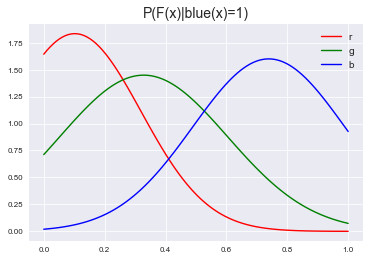

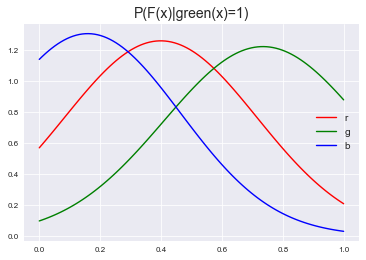

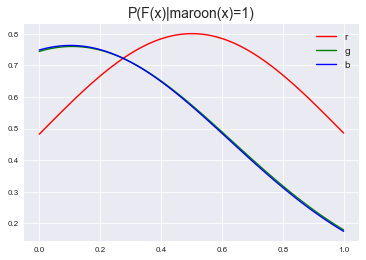

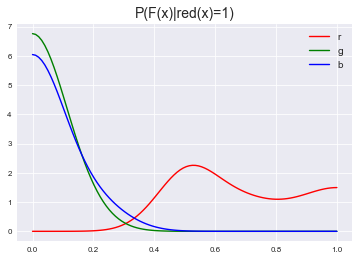

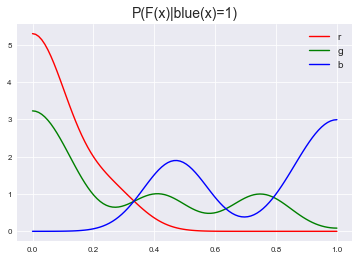

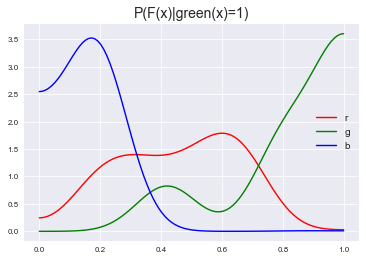

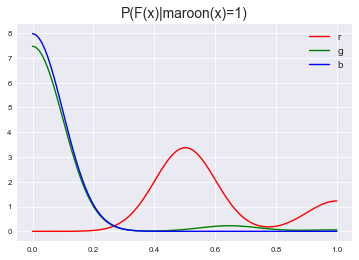

In [5]:
list(exp.test_colour_models('agents.CorrectingAgent_0', draw=True))
list(exp.test_colour_models('agents.CorrectingAgent_1', draw=True))

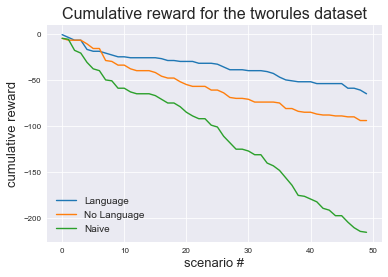

Language -20.0
No Language -30.0
Naive -64.0


In [11]:
exp = load_experiments([226, 259], 'tworules')
exp.show_results(labels=labels)

True Label  G=1 G=0
Predict G=1| 8 | 14 |
        G=0| 2 | 18 |
True Label  Y=1 Y=0
Predict Y=1| 3 | 4 |
        Y=0| 0 | 35 |
True Label  R=1 R=0
Predict R=1| 5 | 0 |
        R=0| 0 | 37 |
True Label  B=1 B=0
Predict B=1| 9 | 2 |
        B=0| 0 | 31 |
True Label  G=1 G=0
Predict G=1| 9 | 6 |
        G=0| 1 | 26 |
True Label  Y=1 Y=0
Predict Y=1| 3 | 3 |
        Y=0| 0 | 36 |
True Label  R=1 R=0
Predict R=1| 5 | 0 |
        R=0| 0 | 37 |
True Label  B=1 B=0
Predict B=1| 8 | 3 |
        B=0| 1 | 30 |


[('green', {'fn': 1, 'fp': 6, 'tn': 26, 'tp': 9}),
 ('yellow', {'fn': 0, 'fp': 3, 'tn': 36, 'tp': 3}),
 ('red', {'fn': 0, 'fp': 0, 'tn': 37, 'tp': 5}),
 ('blue', {'fn': 1, 'fp': 3, 'tn': 30, 'tp': 8})]

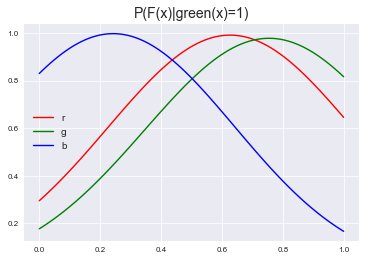

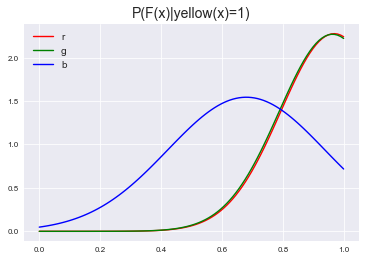

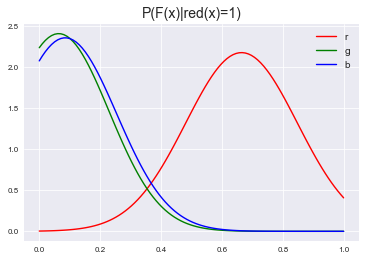

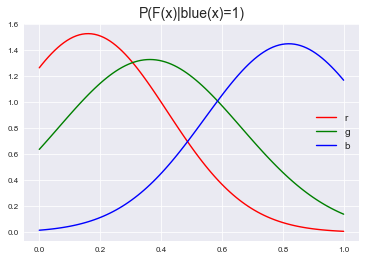

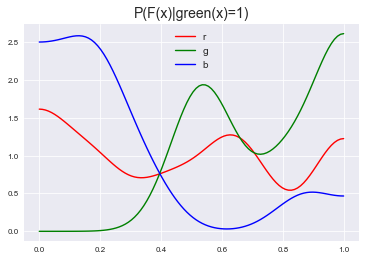

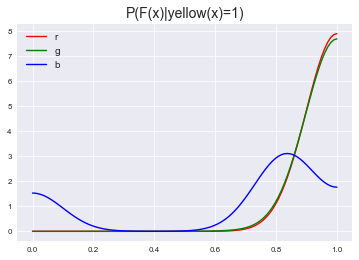

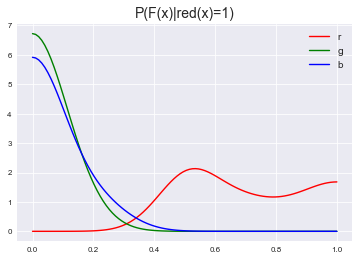

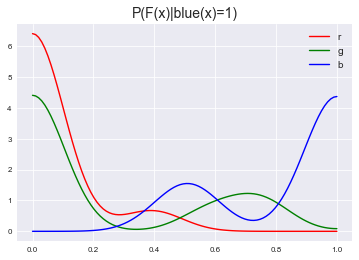

In [7]:
list(exp.test_colour_models('agents.CorrectingAgent_0', draw=True))
list(exp.test_colour_models('agents.CorrectingAgent_1', draw=True))

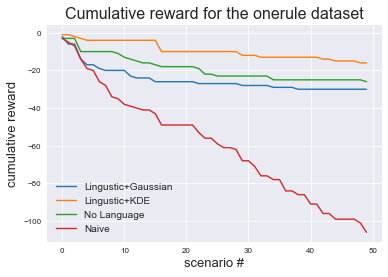

Lingustic+Gaussian -1.0
Lingustic+KDE -3.0
No Language -22.0
Naive -36.0


In [6]:
exp = load_experiments([221, 230, 258], 'onerule')
exp.show_results(labels=labels)


In [10]:
exp.results_files

{'agents.CorrectingAgent_0': <evaluation.ResultsFile at 0x7f5220093978>,
 'agents.CorrectingAgent_1': <evaluation.ResultsFile at 0x7f52200937f0>,
 'agents.NoLanguageAgent_0': <evaluation.ResultsFile at 0x7f52200aef98>,
 'agents.RandomAgent_0': <evaluation.ResultsFile at 0x7f52201f5f98>}

In [15]:
exp.print_colour_models('agents.CorrectingAgent_0')
exp.print_colour_models('agents.CorrectingAgent_1')

True Label  R=1 R=0
Predict R=1| 5 | 0 |
        R=0| 0 | 37 |
red {'tp': 5, 'fp': 0, 'fn': 0, 'tn': 37}
True Label  B=1 B=0
Predict B=1| 9 | 1 |
        B=0| 0 | 32 |
blue {'tp': 9, 'fp': 1, 'fn': 0, 'tn': 32}
True Label  R=1 R=0
Predict R=1| 5 | 0 |
        R=0| 0 | 37 |
red {'tp': 5, 'fp': 0, 'fn': 0, 'tn': 37}
True Label  B=1 B=0
Predict B=1| 9 | 3 |
        B=0| 0 | 30 |
blue {'tp': 9, 'fp': 3, 'fn': 0, 'tn': 30}


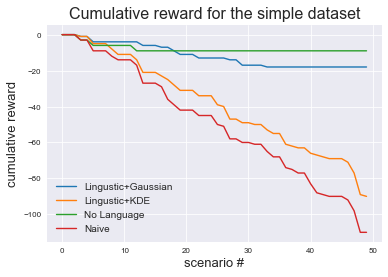

Lingustic+Gaussian 0.0
Lingustic+KDE -43.0
No Language 0.0
Naive -50.0


In [2]:
exp = load_experiments([220, 234, 257], 'simple')
# exp.plot(labels=labels)
# exp.print_test(labels=labels)
exp.show_results(labels)

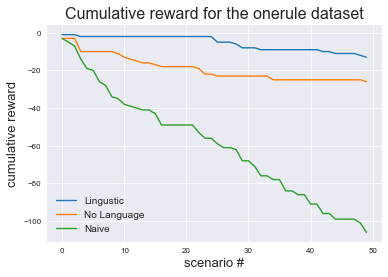

In [19]:
df = exp.to_test_df()
labels = ['Lingustic+Gaussian', 'Lingustic+KDE', 'No Language', 'Naive']
columns = list(filter(lambda x: 'cumsum' in x, df.columns))
for l, c in zip(labels, columns):
    a = df[c].tail(1)
    print(l, a.values[0])

Lingustic+Gaussian 0.0
Lingustic+KDE -43.0
No Language 0.0
Naive -50.0


In [16]:
a.values[0]

-50.0

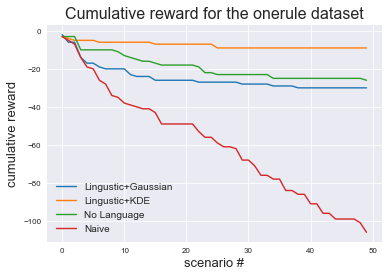

In [20]:
exp = load_experiments([200, 194, 186], 'onerule')
exp.plot(labels=['Lingustic+Gaussian', 'Lingustic+KDE', 'No Language', 'Naive'])

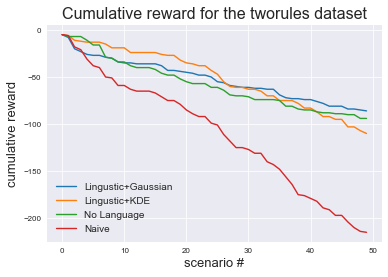

In [21]:
exp = load_experiments([ 201, 195, 190], 'tworules')
exp.plot(labels=['Lingustic+Gaussian', 'Lingustic+KDE', 'No Language', 'Naive'])

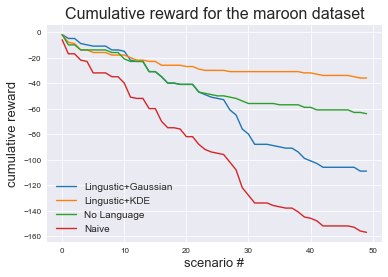

In [22]:
exp = load_experiments([ 202, 196, 192], 'maroon')
exp.plot(labels=['Lingustic+Gaussian', 'Lingustic+KDE', 'No Language', 'Naive'])

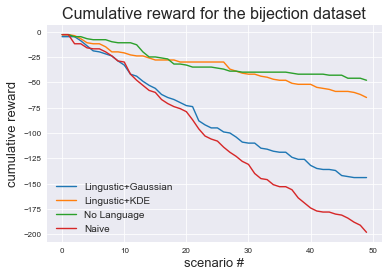

In [23]:
exp = load_experiments([ 203, 197, 191], 'bijection')
exp.plot(labels=['Lingustic+Gaussian', 'Lingustic+KDE', 'No Language', 'Naive'])

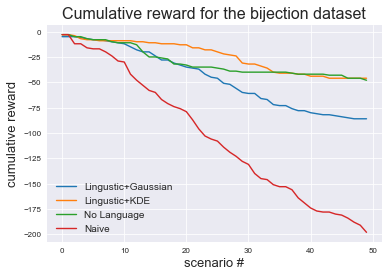

In [24]:
exp = load_experiments([181, 168, 191], 'bijection')
exp.plot(labels=['Lingustic+Gaussian', 'Lingustic+KDE', 'No Language', 'Naive'])

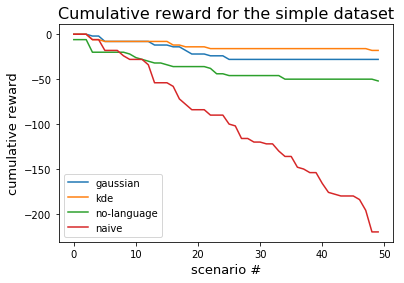

In [3]:
exp = load_experiments([177, 169, 186], 'simple')
exp.plot(labels=['gaussian', 'kde', 'no-language', 'naive'])

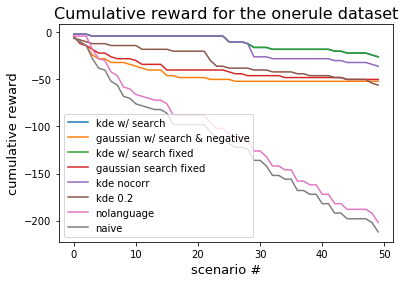

In [4]:
exp = load_experiments([107, 120, 130, 131,  138, 139, 161], 'onerule')
exp.plot(labels=['kde w/ search', 'gaussian w/ search & negative', 
                 'kde w/ search fixed', 'gaussian search fixed', 'kde nocorr', 
                 'kde 0.2', 'nolanguage', 'naive'])

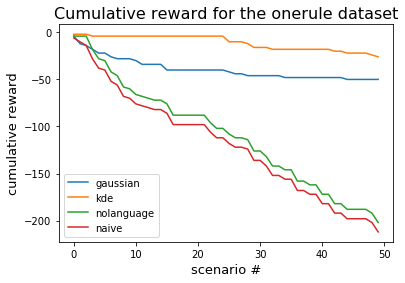

In [5]:
exp = load_experiments([131, 130, 161], 'onerule')
exp.plot(labels=['gaussian', 'kde', 'nolanguage', 'naive'])

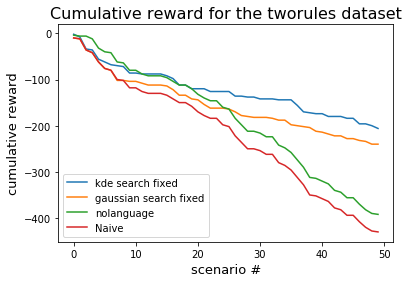

In [14]:
exp = load_experiments([ 127, 134, 162], 'tworules')
exp.plot(labels=['kde search fixed', 
                 'gaussian search fixed', 
                 'nolanguage', 'Naive'])

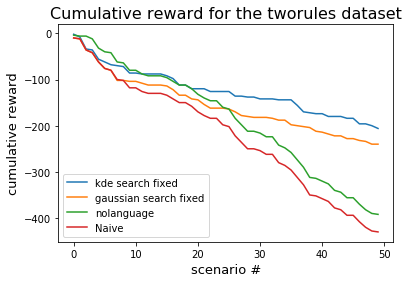

In [4]:
exp = load_experiments([ 127, 134, 162], 'tworules')
exp.plot(labels=['kde search fixed', 
                 'gaussian search fixed', 
                 'nolanguage', 'Naive'])